In [88]:
from simulator.reporters import TransitionReporter
from simulator.core import Task
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
report = TransitionReporter.getListFromPickle("reports/reportmobiledql3.pkl")
report2 = TransitionReporter.getListFromPickle("reports/reportmobiledql2.pkl")

In [90]:
pandasList = []
for item in report:
    pandasList.append([item.task.id(), item.task.arrivalTime(), item.delay, item.powerConsumtion, item.action, item.task.hopLimit()])
    
pandasList2 = []
for item in report2:
    pandasList2.append([item.task.id(), item.task.arrivalTime(), item.delay, item.powerConsumtion, item.action, item.task.hopLimit()])

In [91]:
df = pd.DataFrame(pandasList, columns = ["taskid", "arrival", "delay", "power", "action", "hopLimit"])
df2 = pd.DataFrame(pandasList2, columns = ["taskid", "arrival", "delay", "power", "action", "hopLimit"])

In [109]:
data = df.loc[:, ["power"]].groupby(
        pd.cut(df["power"], np.arange(0.0, 5, 0.01))).count()
data.index = pd.IntervalIndex(data.index.get_level_values('power')).right

data2 = df2.loc[:, ["power"]].groupby(
        pd.cut(df2["power"], np.arange(0.0, 5, 0.01))).count()
data2.index = pd.IntervalIndex(data2.index.get_level_values('power')).right

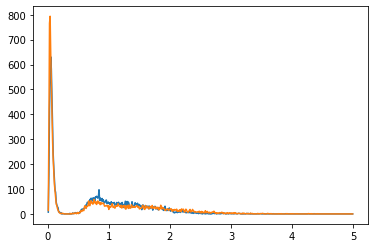

In [110]:
plt.plot(data)
plt.plot(data2)

In [108]:
data2.sum()

power    5305
dtype: int64